
### RTG 2175 Retreat Sylvenstein, 20 - 21.10.2021

# Testing code and increasing code quality

                                    Michael Sonntag

                                    Department Biologie II
                                    Ludwig-Maximilians-Universität München


![G-Node-logo.png](./resources/G-Node-logo.png)

Find this notebook on gin: https://gin.g-node.org/RTG2175/RTG_Retreat_2021

Use git to get it!

```
git clone https://gin.g-node.org/RTG2175/RTG_Retreat_2021.git
```

### Why test code

Controls! When conducting experiments, running controls is essential. Tests act like controls for your code.

- make sure code works as expected


- ensure code changes do not change the expected results


- ensure programming language or library package updates does not lead to different results


- document how code is used: point people to tests to show how the code is MEANT to be used.



### What's your gain from this session

- learn how to write and run simple tests


- pointers in how to write tests for your own projects


- crashcourse in how to write tests in Python


- pointers how to write tests with Matlab



### Write and run basic tests

The most basic way to test code is to write functions that check the result of another function

In [ ]:
assert True

In [ ]:
assert False

In [ ]:
def add_up(a, b):
    return a + b

def test_add_up_succeed():
    assert add_up(1, 2) == 3

def test_add_up_fail():
    assert add_up(1, 2) == 4


In [ ]:
test_add_up_succeed()

In [ ]:
test_add_up_fail()

Lets make it an exercise!

Use `ipython` or a new jupyter notebook to run the code snippets above or get crazy and write a function and test of your own.

Lets also include our amazing `git` skills!

- fetch the RTG workshop noteboook from gin
- create a repo on github e.g. "testlint" (always good to avoid any whitespaces or special characters)
- git clone it locally (ideally using ssh)
- optionally: if you do not want to create a github repo, initialize a local git repository
- move into this repository


### Test frameworks
Could write your own test code without any additional packages. Its more convenient to use something thats already there.
There are already testframeworks out there that make testing more convenient and provide additional functionality
- `pytest`: https://docs.pytest.org
- `nose`: https://nose.readthedocs.io
- `tox`: https://tox.readthedocs.io
- NOTE: if you stumble across `python setup.py test`: this is DEPRECATED.

A fairly good introduction into testing and testing frameworks can be found here: https://pythontesting.net/start-here/

We will be working with the __pytest__ framework.

### Pytest requirements

```
pip install pytest
```


On the command line you can use pytest by just running the command

```
pytest 
```

`pytest` will 
- check all Python files in the current folder and all files in any subfolder.
- any file in a subfolder starting with "test_" will be run
- any file that is specifically handed to pytest will be run
- any function within a run file that starts with "test_" will be run


Lets prepare a directory structure, Python code files and files that will serve as our test:


```
mkdir -p testlint/test
touch testlint/test/example.py
touch testlint/test/example_ignored.py
touch testlint/test/test_example.py
cd testlint
```


The directory structure should look like this:

    testlint
    └─ test
       ├─ example.py
       ├─ example_ignored.py
       └─ test_example.py


Functions and test code can be provided in the same file e.g. in file `example.py`:

File content of `example.py`

```
def add_up(a, b):
    return a + b

def test_add_up_succeed():
    assert add_up(1, 2) == 3

def test_add_up_fail():
    assert add_up(1, 2) == 4

def ignore_me():
    assert "I will be" == "completely ignored"
```

Run the test by providing the file name

```
pytest test/example.py
```


By default Python files are ignored even if they contain test functions:

File content of `example_ignored.py`:

```
def ignored():
    assert "a" == "b"

def test_ignored():
    assert "b" == "c"
```


Run pytest with the contents of folder "tests"

```
pytest test
```


By default Python files with the "test_" prefix are run:

File content of `test_example.py`:

```
def i_am_ignored():
    assert "a" == "b"


def test_i_am_included_success():
    assert 1 == 1


def test_i_am_included_fail():
    assert 1 == 2
```

Again run pytest with the contents of folder test

```
pytest test
```

Including files can be forced by providing the folder content:

```
pytest test/*
```


#### Exercise
- create the package in your git repo as described above
- add code and test code to the files
- run pytest on your code
- fix broken tests or come up with your own
- git commit the changs


##### Great. We know now how to write test functions and how to run them.

But how do we write tests that include functions from a Python code package?


```
mkdir -p testlint
touch testlint/util.py
touch testlint/__init__.py
touch test/__init__.py
touch test/test_testlint_util.py
```

The directory structure should now look like this:

    testlint
    ├─ testlint
    |  ├─ __init__.py
    |  └─ util.py
    └─ test
       ├─ __init__.py
       ├─ example.py
       ├─ example_ignored.py
       ├─ test_example.py
       └─ test_testlint_util.py



Lets add some extremely import code to our package utility file; `testlint/util.py`:

```
def add_yourself(a):
    return a + a
```



Lets make this function available to the testing package without installing the code package via the packages `\__init__` file

`testlint/__init__.py` content:

```
from . import util
```



And lets add a test for our function in the `test/test_testlint_util.py` file:

```
import testlint


def test_add_yourself_success():
    assert testlint.util.add_yourself(1) == 2

def test_add_yourself_fail():
    assert testlint.util.add_yourself(1) == 3
```

We can now run the test by running pylint from the root of the package

```
pytest
```


When working on a specific part of the code, it might be inconvenient to run all tests all the time.

```
pytest test/test_testlint_util.py::test_add_yourself_fail
```


#### Exercise
- update your existing package with the code above
- run the tests
- commit your changes
- Update your remote repository so your hard work is safe!

### Writing tests with Matlab

Matlab versions R2013b+ provide their own Test frameworks by default; you can find documentation on all different available test approaches here:

https://de.mathworks.com/help/matlab/matlab-unit-test-framework.html

The simplest option to run tests is by using the `runtest` command. A more detailled description about the requirements of running script based tests with Matlab can be found here:

https://de.mathworks.com/help/matlab/matlab_prog/write-script-based-unit-tests.html

- the test file name has to start or end with "test"
- individual tests are specified by Matlab sections using the "%%" indicator
- everything above the first indicator is content shared with all tests
- variables defined within a test are not shared with other tests

As an example, a simple test script `testFile.m` with the content:

```
testval = 1

%% Test assert success
assert (testval == 1)

%% Test assert fail
assert(testval == 2)
```

and run the file:

```
result = runtests('testFile');
```

When executing `runtest` without specifying a file, it will run all 


#### Stuck with older Matlab versions: use a minimal custom testing framework

As far as I was able to identify, Matlab intruduced the full unit test framework with the R2013a release. For any previous releases you can write your own minimal testing framework:

All tested code files and test files must be available to the Matlab path; the tests require the following files:
- `tests/CustomRunTests.m` ... script to start running all available tests.
- `tests/wrapper.m` ... wrapper function handling occurring errors.
- `tests/TestUtils.m` ... Utility class printing the stack in case of an error.
- `tests/TestExample.m` ... actual test file; there can be more than one file.

The files require the following content:

`tests/CustomRunTests.m`: add any new test files to the `all_tests` variable.
```
%-- Runner for all other tests.
clear all;

stats.okCount = 0;
stats.errorCount = 0;

disp([10 'starting tests']);

all_tests = {};
all_tests{end+1} = struct('name', 'EXAMPLE', 'tests', {TestExample()});

for i = 1:length(all_tests)
    fprintf([10 'Execute ' all_tests{i}.name ' tests:\n\n']);
    
    for j = 1:length(all_tests{i}.tests)
        stats = wrapper(all_tests{i}.tests{j}, stats);
    end
end;

disp([10 'Tests: ' num2str(stats.okCount) ' succeeded, ' num2str(stats.errorCount) ' failed']);
```


`tests/wrapper.m`: no need to edit this file

```
function stats = wrapper( func, stats )
%WRAPPER Wrapper function for every test that catches the exception
%   and prints out detaied report.

    try
        clearvars -except stats func; %-- ensure clean workspace

        func(); % execute unit test

        fprintf('Test %s ... OK\n', func2str(func));
        stats.okCount = stats.okCount + 1;
        clearvars -except stats func; %-- close handles
        
    catch me
        fprintf('Test %s ... ERROR\n', func2str(func));
        TestUtils.printErrorStack(me);
        stats.errorCount = stats.errorCount + 1;
    end;

end
```


`tests/TestUtils.m`: no need to edit this file

```
classdef TestUtils
    methods(Static)
        function printErrorStack(me)
            disp([9 me.message]);
            printStack = {me.stack(:).name; me.stack(:).file; me.stack(:).line}';
            disp(vertcat({'Name', 'File', 'Line'}, printStack));
        end;
    end;
end
```

`tests/TestExample.m`: this file contains the actual tests; when adding a new test, also add it to the function collection. There can also be multiple test files.

```
function funcs = TestExample
%TESTEXAMPLE runs example tests
%   Detailed explanation goes here

    funcs = {};
    funcs{end+1} = @test_add;
    funcs{end+1} = @test_subtract;
end

%% Test: Addition test
function [] = test_add( varargin )
    assert(1+1 == 2);
    assert(1+1 == 3);
end

%% Test: Subtraction test
function [] = test_subtract( varargin )
    assert(2-1 == 1);
end
```

The tests can be run by executing the `CustomRunTests.m` script. There can be more than one Test file and every file can of course contain more than one test, but when adding files or tests the entries in `CustomRunTests.m` or in the corresponding test file have to be updated.


## Start writing tests for project code

- write a single test that shows that your code spits out the results you expect
  - select a raw data file where you KNOW what the results of your analysis should be.
  - keep this file with your code.
  - write a test, that runs your code using this file and assert the results are what you expect.
  - run this test everytime you make changes to your code


- usually an analysis has multiple distinct steps with distinct result files.
  - split your code into functions for each step
  - write a test for every step where again you control the input and the outpu.
  - this helps to narrow down if things break
  - this also documents how the individual steps should be run


- when starting a new project or you are adding new code to an existing one
  - write a test when the new code works the first time
  - run this test everytime changes are made to the code


- re-use development "test" code
  - when developing you usually try it out until it works interactively; using `ipython`, in your IDE of choice, etc.
  - keep this code around! Copy your ipython history to a script file, add an assert at the very end and you have your first test.


### Practical testing issues

#### Refactor code to make it more testable


<IPython.core.display.Javascript object>


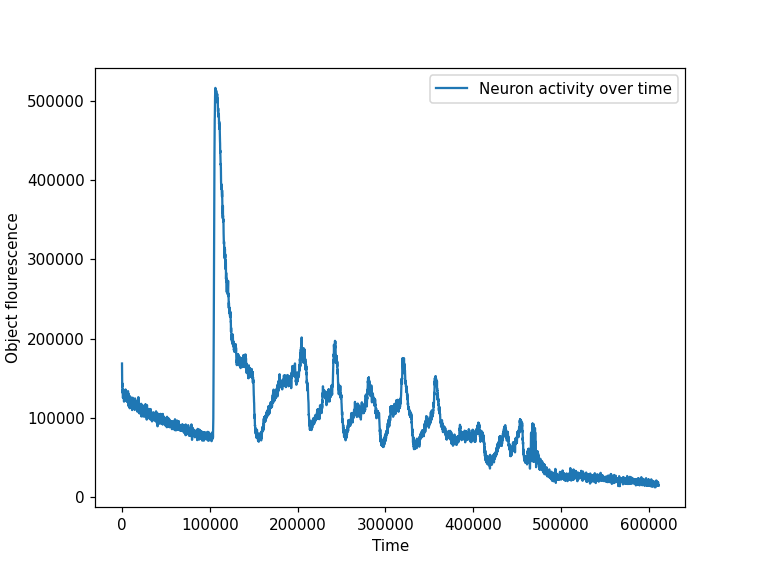

In [48]:
%matplotlib notebook
#%matplotlib widget

import matplotlib.pyplot as plt
import pandas as pd


HEAD_COL = ['curr_frame', 'time_elapsed', 'obj_subtracted', 'subtracted_value',
            'obj_value', 'obj_size', 'background_value', 'xold', 'yold']


parse_file = "./resources/ca_rawdatafile.csv"

ca_data = pd.read_csv(parse_file, header=None, names=HEAD_COL)

extract_data = ca_data["obj_value"]
time_elapsed = ca_data["time_elapsed"]

edit_data = extract_data*2

edit_data.to_csv("mod_data.txt")

plt.plot(time_elapsed, edit_data, label="Neuron activity over time")
plt.xlabel("Time")
plt.ylabel("Object flourescence")
plt.legend()
plt.show()


Use a main function

<table>
<tr>
<td>
```
```
</td>
<td>
```
```
</td>
</tr>
</table>

<table>
<tr>
<td>
```
```
</td>
<td>
```
```
</td>
</tr>
</table>

#### Testing resource files

Keep your test resources close. Ideally in a `resources` folder right with the tests:

    testlint
    ├─ testlint
    |  ├─ __init__.py
    |  └─ util.py
    └─ test
       ├─ resources
       |  └─ resource_file.csv
       ├─ __init__.py
       ├─ example.py
       ├─ example_ignored.py
       ├─ test_example.py
       └─ test_testlint_util.py


#### Testing expected fails

We might want to make sure that our code fails when it should fail. Otherwise we might not get the results we should.


In [19]:
import pytest

def append_gullibly(obj, item):
    obj.append(item)

    return obj

def test_append_gullibly_success():
    test_obj = []
    content = "i am an item"
    res = append_gullibly(test_obj, content)
    assert res[0] == content

def test_append_gullibly_fail():
    test_obj = 1
    content = "i am an item"
    with pytest.raises(AttributeError):
        res = append_gullibly(test_obj, content)

def test_append_gullibly_invalid_exception():
    test_obj = 1
    content = "i am an item"
    with pytest.raises(KeyError):
        res = append_gullibly(test_obj, content)


In [10]:
test_append_gullibly_success()

In [20]:
test_append_gullibly_fail()

In [21]:
test_append_gullibly_invalid_exception()

AttributeError: 'int' object has no attribute 'append'

#### Handling transient testing output files

Use the `tempfile` package:

https://docs.python.org/3/library/tempfile.html


In [4]:
import tempfile


test_dir = tempfile.mkdtemp()

print(test_dir)


/tmp/tmpt4v2fsl6


In [7]:
test_dir_suffix = tempfile.mkdtemp(suffix="-utiltest")
print(test_dir_suffix)

/tmp/tmpxx23b4dm-utiltest


## Increasing code quality

Keeping code organized and well maintained has multiple benefits. Most of these benefits lie in the future...
- have an easier time reading your own code:
  - keep your naming scheme consistent and include useful variable names so you know what the content is
  - using small functions or methods with fewer variables helps to grasp what they actually do
- have an easier time updating and rewriting your code
- have an easier time writing useful tests
  - having small functions help writing easy tests
- make it easier for other people to understand your code
- confidence booster: don't be hesitant to show other people your code because of quality
- write better code over time


General guidelines to write clean Python code - PEP8:
https://www.python.org/dev/peps/pep-0008/

These are many things to keep in mind and do not even touch "code smells". To help increase code quality and making it part of a routine, there are "linters" out there to make it easy for you. Examples are:
- pylint
- flake8
- autopep8
- pychecker
- pylama
- ...

We are going to use pylint (https://pylint.org/) which has a good balance between clean code styles and identifying code smells.

### pylint requirements


```
pip install pylint
```

Run it from the command line

```
pylint pylint testlint/util.py
```

And now we work our way through all the issues...


You can deactivate specific messages either
- via the command line
- via a setup file

You can ignore specific messages

```
pylint --disable=C0114 testlint/util.py
```

Create a file "setup.cfg" at the root of the project and paste the following:
```
[pycodestyle]
max-line-length = 100
statistics = True
```



#### Exercise
- lint your way through the files you created so far.

- Make it a habit of running pylint before you commit


- when starting to lint existing projects:
  - there will be a long list of things to fix
  - work at it over time; focus on single message IDs only
  - run tests when you are touching actual code


#### Linting makes sense, some examples

- import order
- variable name length
- no-shadow
- too many statements


#### How to keep jupyter notebooks clean?

https://stackoverflow.com/questions/26126853/verifying-pep8-in-ipython-notebook-code

```
pip install flake8 pycodestyle_magic
```

In [ ]:
%load_ext pycodestyle_magic

In [ ]:
%pycodestyle_on

In [ ]:
a=1
print(a)

I noted, that using pycodestyle_magic sometimes disables cell print output.

In [ ]:
a="I shall not be printed"
a

To do cleanup on the command line, one can also convert a Jupyter notebook to a script and run pylint on this script for cleanup:

```
jupyter nbconvert --to=script --output-dir=/tmp/converted-notebooks/ notebook_name.ipynb
pylint --disable=C0103,C0413,C0305 /tmp/converted-notebooks/notebook_name.py
```

Here is also an interesting blogpost how jupyter notebook testing can be further automatized: https://www.blog.pythonlibrary.org/2018/10/16/testing-jupyter-notebooks/

### Matlab code checker and styleguides

Since R2011b, Matlab ships its own code checker: https://de.mathworks.com/help/matlab/ref/checkcode.html

The checker can be run against a single file:
```
checkcode(filename)
```

It will also print a list of potential errors and suggestions how to improve the code quality.

Older versions of Matlab feature a tool called `mlintrpt` that basically works identical to `checkcode`.

I did not find an official document regarding Matlab code style analogous to PEP8, but there are a couple of inofficial documents around that address certain standards that can be observed when writing Matlab code to keep it consistent and easy to read; e.g.:

http://www.cs.cornell.edu/courses/cs321/2003fa/Matlab%20Coding%20Style.pdf

### Create a workflow habit

- `git fetch --all`
- `git pull` or `git rebase [yourBranch]`
- write code
- create a test / update existing test
- run `pytest` and fix any issues
- run `pylint` and fix any issues
- `git commit`
- `git push`

And from time to time:
- recreate your environment from scratch
  - use a different Python version
  - re-install all required packages into a clean environment 

## Linklist
### Python
- https://docs.pytest.org
- https://nose.readthedocs.io
- https://tox.readthedocs.io
- https://pythontesting.net/start-here/
- https://docs.python.org/3/library/tempfile.html


- https://www.python.org/dev/peps/pep-0008
- https://pylint.org
- https://stackoverflow.com/questions/26126853/verifying-pep8-in-ipython-notebook-code
- https://www.blog.pythonlibrary.org/2018/10/16/testing-jupyter-notebooks

### Matlab
- https://de.mathworks.com/help/matlab/matlab-unit-test-framework.html
- https://de.mathworks.com/help/matlab/matlab_prog/write-script-based-unit-tests.html


- https://de.mathworks.com/help/matlab/ref/checkcode.html
- http://www.cs.cornell.edu/courses/cs321/2003fa/Matlab%20Coding%20Style.pdf